<a href="https://colab.research.google.com/github/nilesh2gupta/STS-Model/blob/main/Direct_speech_to_speech_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  noisereduce

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import noisereduce as nr
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import soundfile as sf
import warnings
warnings.filterwarnings("ignore")
from scipy.io import wavfile as wav



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sr = 22050
n_mfcc = 13
n_fft = 2048
hop_length = 512

def feature_extractor_mfcc(filename):
    y, sr = librosa.load(filename)
    n_mfcc = 13
    n_fft = 2048
    hop_length = 512
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return [mfccs , sr , n_fft , hop_length]



def feature_extractor_log_spect(filename):
    y, sr = librosa.load(filename)
    n_fft = 2048
    hop_length = 512
    n_mels = 128
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    return [mel_spectrogram , sr , n_fft , hop_length , n_mels]

def noise_removal(filename):
    y, sr = librosa.load(filename, sr=None)
    y_denoised = nr.reduce_noise(y=y, sr=sr)
    return y_denoised

def display_waveform(filename):
    y, sr = librosa.load(filename)
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    print(librosa.display.waveshow(y, sr=sr))
    return (ipd.Audio(filename))

def mfcc_to_audio_converter(mfcc , sr , n_fft , hop_length):

    mel_spectrogram = librosa.feature.inverse.mfcc_to_mel(mfcc)
    spectrogram = librosa.feature.inverse.mel_to_stft(mel_spectrogram, sr=sr, n_fft=n_fft)
    reconstructed_audio = librosa.griffinlim(spectrogram, hop_length=hop_length, n_iter=32)
    return reconstructed_audio

def mel_spect_to_audio_converter(mel_spectrogram ,sr = 22050 , n_fft = 2048 , hop_length = 512 ) :

    linear_spectrogram = librosa.feature.inverse.mel_to_stft(mel_spectrogram, sr=sr, n_fft=n_fft)
    reconstructed_audio = librosa.griffinlim(linear_spectrogram, hop_length=hop_length, n_iter=32)
    return reconstructed_audio
def log_mel_spect_to_audio_converter(log_mel_spectrogram, sr = 22050, n_fft = 2048, hop_length = 512):

    mel_spectrogram = librosa.db_to_power(log_mel_spectrogram)
    linear_spectrogram = librosa.feature.inverse.mel_to_stft(mel_spectrogram, sr=sr, n_fft=n_fft)
    reconstructed_audio = librosa.griffinlim(linear_spectrogram, hop_length=hop_length, n_iter=32)

    return reconstructed_audio
def two_audio_comparison(audio_path_1 , audio_path_2):
    y1, sr1 = librosa.load(audio_path_1)
    y2, sr2 = librosa.load(audio_path_2)
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y1, sr=sr1)
    plt.title('Audio 1')
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y2, sr=sr2)
    plt.title('Audio 2')
    plt.tight_layout()
    plt.show()


def save_audio(audio , sr):
    sf.write("audio.wav", audio, sr)

def feature_extractor_spect(filename, n_fft=2048, hop_length=512, n_mels=128):
    y, sr = librosa.load(filename)
    y = nr.reduce_noise(y=y, sr=sr)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    return mel_spectrogram

def pad_array(array, max_len):
    array_len = array.shape[0]
    if array_len < max_len:
        padding = np.zeros((max_len - array_len, array.shape[1]))
        array = np.concatenate([array, padding], axis=0)
    return array

def add_input(filename, model_array, max_len):
    features = feature_extractor_spect(filename).T
    features = pad_array(features, max_len)
    model_array.append(features)
    return model_array


In [ ]:
model_input = []
model_output = []


files_input = []
files_output = []


for i in range(1,201):
    file_path_eng = f"/content/drive/MyDrive/machine_eng_audio/audio_{i}.mp3"
    file_path_hin = f"/content/drive/MyDrive/machine_hindi_audio/audio_{i}.mp3"
    files_input.append(file_path_eng)
    files_output.append(file_path_hin)


max_len = 0
for file in files_input + files_output:
    mel_features = feature_extractor_spect(file)
    max_len = max(max_len, mel_features.shape[1])


for file in files_input:
    model_input = add_input(file, model_input, max_len)

for file in files_output:
    model_output = add_input(file, model_output, max_len)


model_input = np.array(model_input)
model_output = np.array(model_output)

print(f"Model Input Shape: {model_input.shape}")
print(f"Model Output Shape: {model_output.shape}")

Model Input Shape: (200, 536, 128)
Model Output Shape: (200, 536, 128)


Model: "Flowchart_Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, None, 128)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_27 (NotEqual)   │ (None, None, 128)      │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_1 (Masking)       │ (None, None, 128)      │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_53 (Any)              │ (None, None)           │              0 │ not_equal_27[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1_dropo… │ (None, None, 128)      │              0 │ masking_1[0][0],       │
│ (TimeDistributed)         │                        │                │ any_53[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1_lstm_5    │ [(None, None, 256),    │        263,168 │ time_distributed_1_dr… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_53[0][0]           │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2_lstm_6    │ [(None, None, 256),    │        394,240 │ bidirectional_1_lstm_… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_53[0][0]           │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512)            │              0 │ bidirectional_1_lstm_… │
│ (Concatenate)             │                        │                │ bidirectional_1_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 512)            │              0 │ bidirectional_1_lstm_… │
│ (Concatenate)             │                        │                │ bidirectional_1_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, None, 512)      │      1,574,912 │ bidirectional_2_lstm_… │
│                           │                        │                │ concatenate_1[0][0],   │
│                           │                        │                │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_5_dense… │ (None, None, 128)      │         65,664 │ lstm_7[0][0],          │
│ (TimeDistributed)         │                        │                │ any_53[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,297,984 (8.77 MB)

 Trainable params: 2,297,984 (8.77 MB)

 Non-trainable params: 0 (0.00 B)

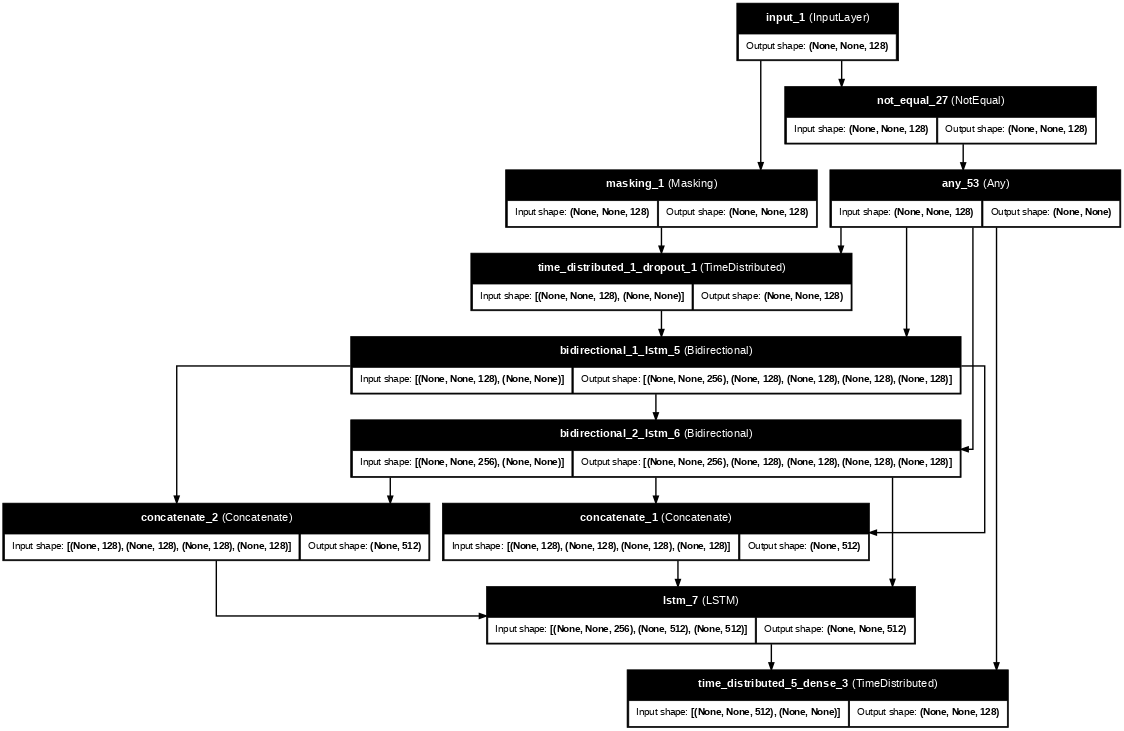

In [ ]:
import tensorflow as tf
from IPython.display import Image, display
import tensorflow as tf
from tensorflow.keras.layers import Input, Masking, TimeDistributed, Dropout, Bidirectional, LSTM, Concatenate, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


# Input Layer
input_layer = Input(shape=(None, 128), name="input_1")

# Masking Layer
masking_layer = Masking(mask_value=0.0, name="masking_1")(input_layer)

# TimeDistributed Dropout
time_distributed_dropout = TimeDistributed(Dropout(0.5), name="time_distributed_1_dropout_1")(masking_layer)

# First Bidirectional LSTM
bilstm_1 = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bidirectional_1_lstm_5")
output_bilstm_1, forward_h1, forward_c1, backward_h1, backward_c1 = bilstm_1(time_distributed_dropout)

# Second Bidirectional LSTM
bilstm_2 = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bidirectional_2_lstm_6")
output_bilstm_2, forward_h2, forward_c2, backward_h2, backward_c2 = bilstm_2(output_bilstm_1)

# Concatenation of all LSTM states
concat_h = Concatenate(name="concatenate_1")([forward_h1, backward_h1, forward_h2, backward_h2])
concat_c = Concatenate(name="concatenate_2")([forward_c1, backward_c1, forward_c2, backward_c2])

# LSTM with Concatenated States as Initial States
lstm = LSTM(512, return_sequences=True, name="lstm_7")
lstm_output = lstm(output_bilstm_2, initial_state=[concat_h, concat_c])

# TimeDistributed Dense Layer
final_output = TimeDistributed(Dense(128), name="time_distributed_5_dense_3")(lstm_output)

# Model
model = tf.keras.Model(inputs=input_layer, outputs=final_output, name="Flowchart_Model_2")

# Summary
model.summary()



model_plot = tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True , dpi = 50)
display(Image(filename="model_1.png"))


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - loss: 9.2142 - mse: 3.8337
Epoch 1: mse improved from inf to 3.76391, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 727ms/step - loss: 9.2020 - mse: 3.8273
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 9.1118 - mse: 3.8097
Epoch 2: mse improved from 3.76391 to 3.70669, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - loss: 9.0910 - mse: 3.8004
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 8.9578 - mse: 3.8281
Epoch 3: mse improved from 3.70669 to 3.70534, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 497ms/step - loss: 8.9417 - mse: 3.8169
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 8.5680 - mse: 3.7537
Epoch 4: mse did not improve from 3.70534
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/ste

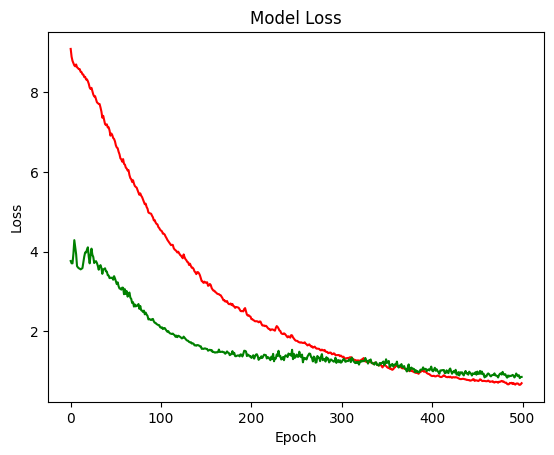

In [ ]:
import matplotlib.pyplot as plt
checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/speech_to_speech_model/audio_model_.keras', monitor='mse', save_best_only=True, mode='min', verbose=1)


model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mse']
)

history = model.fit(x=model_input, y=model_output, batch_size=20, epochs=500 , callbacks = [checkpoint_callback])
plt.plot(history.history['loss'] , color = 'r')
plt.plot(history.history['mse'] , color = 'g')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Masking, TimeDistributed, Dropout, Bidirectional,
    LSTM, Concatenate, Dense, Conv1D, Add
)
from tensorflow.keras.models import Model

# Input Layer
input_layer = Input(shape=(None, 128), name="input_1")

# Masking Layer
masking_layer = Masking(mask_value=0.0, name="masking_1")(input_layer)

# TimeDistributed Dropout
time_distributed_dropout = TimeDistributed(Dropout(0.5), name="time_distributed_1_dropout_1")(masking_layer)

# First Bidirectional LSTM
bilstm_1 = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bidirectional_1_lstm_5")
output_bilstm_1, forward_h1, forward_c1, backward_h1, backward_c1 = bilstm_1(time_distributed_dropout)

# Second Bidirectional LSTM
bilstm_2 = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bidirectional_2_lstm_6")
output_bilstm_2, forward_h2, forward_c2, backward_h2, backward_c2 = bilstm_2(output_bilstm_1)

# Concatenation of all LSTM states
concat_h = Concatenate(name="concatenate_1")([forward_h1, backward_h1, forward_h2, backward_h2])
concat_c = Concatenate(name="concatenate_2")([forward_c1, backward_c1, forward_c2, backward_c2])

# LSTM with Concatenated States as Initial States
lstm = LSTM(512, return_sequences=True, name="lstm_7")
lstm_output = lstm(output_bilstm_2, initial_state=[concat_h, concat_c])

# TimeDistributed Dense Layer
dense_output = TimeDistributed(Dense(128), name="time_distributed_5_dense_3")(lstm_output)

# Conv1D layer for feature extraction
conv1 = Conv1D(128, kernel_size=3, padding="same", activation="relu", name="conv1d_1")(dense_output)
conv2 = Conv1D(128, kernel_size=3, padding="same", activation="relu", name="conv1d_2")(conv1)

# Residual Connection
residual_output = Add(name="residual_add")([dense_output, conv2])

# Another Conv1D layer with dilation to capture long-range dependencies
conv3 = Conv1D(128, kernel_size=3, dilation_rate=2, padding="same", activation="relu", name="conv1d_3")(residual_output)

# Final TimeDistributed Dense Layer to refine the output
final_output = TimeDistributed(Dense(128), name="final_time_distributed_dense")(conv3)

# Model
model = Model(inputs=input_layer, outputs=final_output, name="Flowchart_Model_With_PosNet")

# Summary
model.summary()



Model: "Flowchart_Model_With_PosNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, None, 128)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_34 (NotEqual)   │ (None, None, 128)      │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_1 (Masking)       │ (None, None, 128)      │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_60 (Any)              │ (None, None)           │              0 │ not_equal_34[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1_dropo… │ (None, None, 128)      │              0 │ masking_1[0][0],       │
│ (TimeDistributed)         │                        │                │ any_60[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1_lstm_5    │ [(None, None, 256),    │        263,168 │ time_distributed_1_dr… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_60[0][0]           │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2_lstm_6    │ [(None, None, 256),    │        394,240 │ bidirectional_1_lstm_… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_60[0][0]           │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512)            │              0 │ bidirectional_1_lstm_… │
│ (Concatenate)             │                        │                │ bidirectional_1_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 512)            │              0 │ bidirectional_1_lstm_… │
│ (Concatenate)             │                        │                │ bidirectional_1_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
│                           │                        │                │ bidirectional_2_lstm_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, None, 512)      │      1,574,912 │ bidirectional_2_lstm_… │
│                           │                        │                │ concatenate_1[0][0],   │
│                           │                        │                │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_5_dense… │ (None, None, 128)      │         65,664 │ lstm_7[0][0],          │
│ (TimeDistributed)         │                        │                │ any_60[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)    

 Total params: 2,462,336 (9.39 MB)

 Trainable params: 2,462,336 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 3.9545 - mse: 3.9545
Epoch 1: mse improved from inf to 3.80633, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_3.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 564ms/step - loss: 3.9411 - mse: 3.9411
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 3.8962 - mse: 3.8962
Epoch 2: mse improved from 3.80633 to 3.71269, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_3.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - loss: 3.8795 - mse: 3.8795
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - loss: 3.5410 - mse: 3.5410
Epoch 3: mse improved from 3.71269 to 3.66648, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_3.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 575ms/step - loss: 3.5524 - mse: 3.5524
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - loss: 3.5772 - mse: 3.5772
Epoch 4: mse improved from 3.66648 to 3.63771, saving model to /content/drive

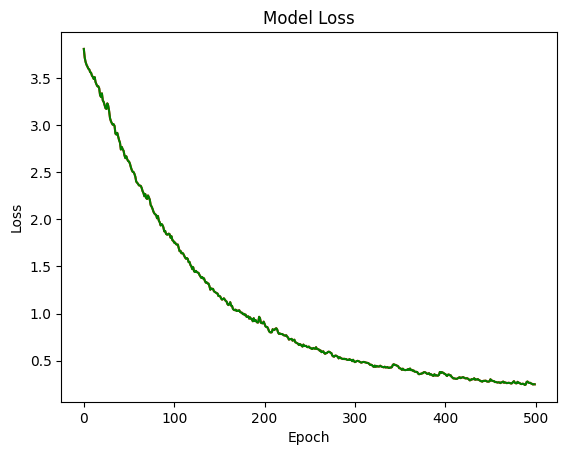

In [ ]:
import matplotlib.pyplot as plt
checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/speech_to_speech_model/audio_model_3.keras', monitor='mse', save_best_only=True, mode='min', verbose=1)


model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mse']
)

history = model.fit(x=model_input, y=model_output, batch_size=20, epochs=500 , callbacks = [checkpoint_callback])
plt.plot(history.history['loss'] , color = 'r')
plt.plot(history.history['mse'] , color = 'g')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, None, 128)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_3 (NotEqual)    │ (None, None, 128)      │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_1 (Masking)       │ (None, None, 128)      │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_3 (Any)               │ (None, None)           │              0 │ not_equal_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Encoder-Batchnorm-1       │ (None, None, 128)      │            512 │ masking_1[0][0],       │
│ (BatchNormalization)      │                        │                │ any_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1_dropo… │ (None, None, 128)      │              0 │ Encoder-Batchnorm-1[0… │
│ (TimeDistributed)         │                        │                │ any_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1_lstm_1    │ [(None, None, 256),    │        263,168 │ time_distributed_1_dr… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_3[0][0]            │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2_lstm_2    │ [(None, None, 256),    │        394,240 │ bidirectional_1_lstm_… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_3[0][0]            │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3_lstm_3    │ [(None, None, 256),    │        394,240 │ bidirectional_2_lstm_… │
│ (Bidirectional)           │ (None, 128), (None,    │                │ any_3[0][0]            │
│                           │ 128), (None, 128),     │                │                        │
│                           │ (None, 128)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, None, 256)      │        263,168 │ bidirectional_3_lstm_… │
│ (MultiHeadAttention)      │                        │                │ bidirectional_3_lstm_… │
│                           │                        │                │ any_3[0][0],           │
│                           │                        │                │ any_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Decoder-Batchnorm-1       │ (None, None, 256)      │          1,024 │ multi_head_attention_… │
│ (BatchNormalization)      │                        │                │ any_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2_dropo… │ (None, None, 256)      │              0 │ Decoder-Batchnorm-1[0… │
│ (TimeDistributed)    

 Total params: 2,399,872 (9.15 MB)

 Trainable params: 2,399,104 (9.15 MB)

 Non-trainable params: 768 (3.00 KB)

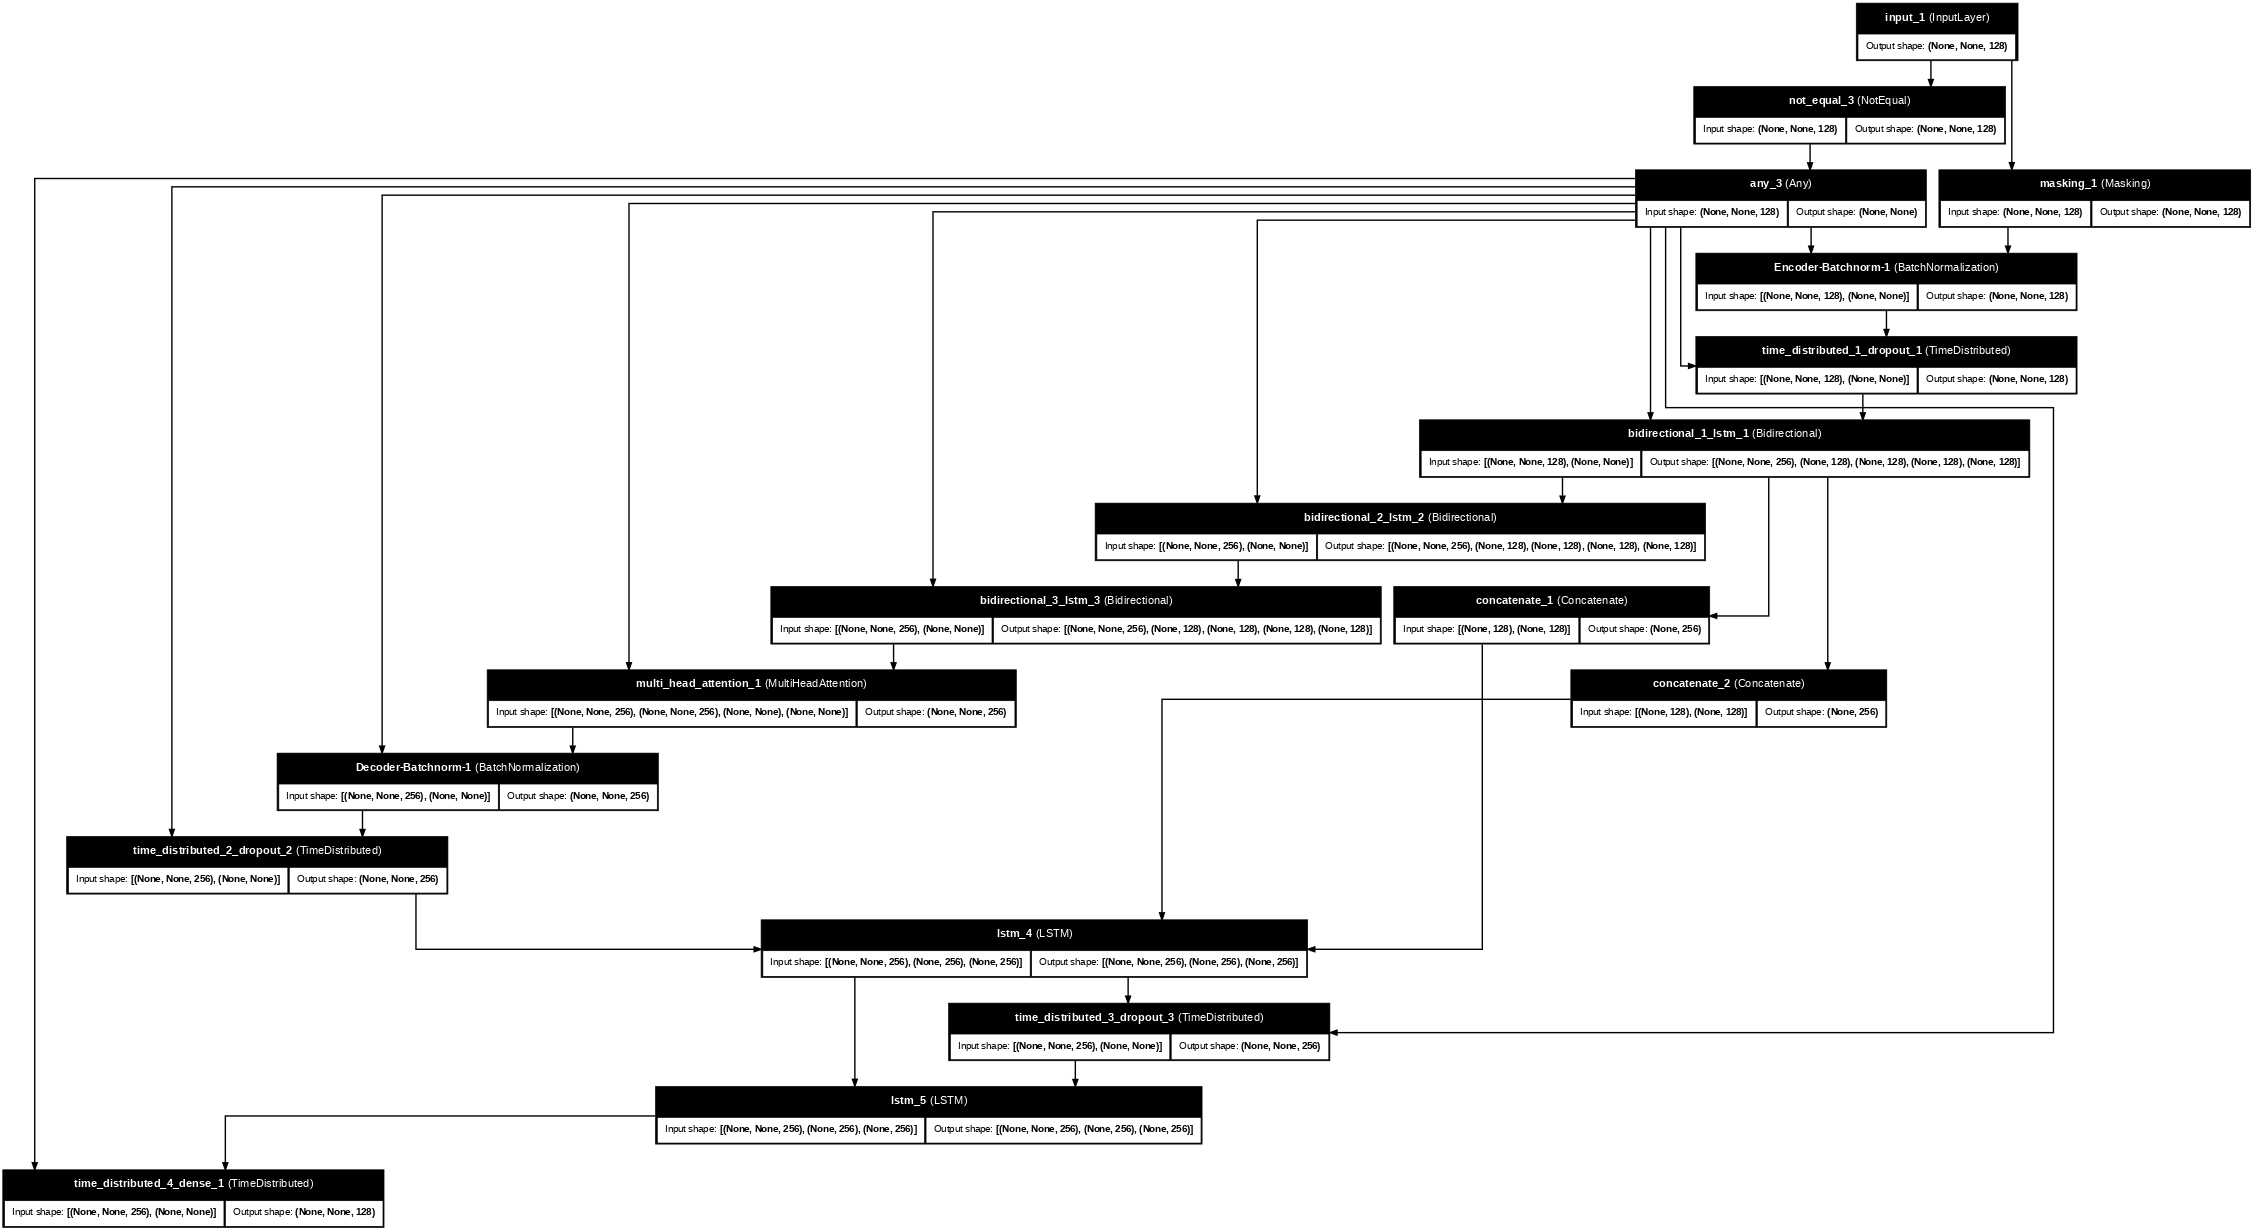

In [ ]:
import keras
from keras import layers

# Input layer
inputs = keras.Input(shape=(None, 128), name="input_1")
x = layers.Masking(name="masking_1")(inputs)

# Encoder
x = layers.BatchNormalization(name="Encoder-Batchnorm-1")(x)
x = layers.TimeDistributed(layers.Dropout(0.1), name="time_distributed_1_dropout_1")(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, return_state=True), name="bidirectional_1_lstm_1")(x)
lstm1_output, state_h1, state_c1, state_h1_back, state_c1_back = x

x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, return_state=True), name="bidirectional_2_lstm_2")(x[0])
lstm2_output, state_h2, state_c2, state_h2_back, state_c2_back = x

x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, return_state=True), name="bidirectional_3_lstm_3")(x[0])
lstm3_output, state_h3, state_c3, state_h3_back, state_c3_back = x

# Multi-Head Attention
attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=32, name="multi_head_attention_1")(x[0], x[0])

# Concatenate hidden states
state_h = layers.Concatenate(name="concatenate_1")([state_h1, state_h1_back])
state_c = layers.Concatenate(name="concatenate_2")([state_c1, state_c1_back])

# Decoder
x = layers.BatchNormalization(name="Decoder-Batchnorm-1")(attention_output)
x = layers.TimeDistributed(layers.Dropout(0.1), name="time_distributed_2_dropout_2")(x)
x = layers.LSTM(256, return_sequences=True, return_state=True, name="lstm_4")(x, initial_state=[state_h, state_c])
lstm4_output, state_h4, state_c4 = x
x = layers.TimeDistributed(layers.Dropout(0.1), name="time_distributed_3_dropout_3")(lstm4_output)
x = layers.LSTM(256, return_sequences=True, return_state=True, name="lstm_5")(x, initial_state=[state_h4, state_c4])

# Final Dense layer
x = layers.TimeDistributed(layers.Dense(128), name="time_distributed_4_dense_1")(x[0])

# Model definition
model_2 = keras.Model(inputs=inputs, outputs=x)

# Summary
model_2.summary()



model_plot = tf.keras.utils.plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True , dpi = 50)
display(Image(filename="model_2.png"))


In [ ]:
checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/speech_to_speech_model/audio_model_2.keras', monitor='mse', save_best_only=True, mode='min', verbose=1)


model_2.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    metrics = ['mse']
)

history = model_2.fit(x=model_input, y=model_output, batch_size=20, epochs=500 , callbacks = [checkpoint_callback])
plt.plot(history.history['loss'] , color = 'r')
plt.plot(history.history['mse'] , color = 'g')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - loss: 8.8473 - mse: 3.7802
Epoch 1: mse improved from inf to 3.93236, saving model to /content/drive/MyDrive/speech_to_speech_model/audio_model_2.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 193s 957ms/step - loss: 8.8742 - mse: 3.7940
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - loss: 8.9986 - mse: 3.9804
Epoch 2: mse did not improve from 3.93236
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 676ms/step - loss: 8.9947 - mse: 3.9859
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - loss: 8.5583 - mse: 4.0675
Epoch 3: mse did not improve from 3.93236
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 764ms/step - loss: 8.5852 - mse: 4.0903
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - loss: 8.8610 - mse: 4.7300
Epoch 4: mse did not improve from 3.93236
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 688ms/step - loss: 8.8505 - mse: 4.7184
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - loss: 9.1358 - mse: 4.7519
Epoch 5: mse did not improve from 3.93236
10/10 ━━━━━━

In [ ]:
import keras
def inference_function(input_audio_file, model_path):

    try:

        model = keras.models.load_model(model_path)
        max_len = 536

        def feature_extractor_spect(filename, n_fft=2048, hop_length=512, n_mels=128):
            y, sr = librosa.load(filename)
            y = nr.reduce_noise(y=y, sr=sr)
            mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
            return mel_spectrogram

        def pad_array(array, max_len):
            array_len = array.shape[0]
            if array_len < max_len:
                padding = np.zeros((max_len - array_len, array.shape[1]))
                array = np.concatenate([array, padding], axis=0)
            return array




        features = feature_extractor_spect(input_audio_file).T
        features = pad_array(features, max_len)
        input_data = np.expand_dims(features, axis=0)


        predicted_spectrogram = model.predict(input_data)
        predicted_audio = mel_spect_to_audio_converter(predicted_spectrogram[0].transpose())
        predicted_audio = nr.reduce_noise(y=predicted_audio, sr=sr)
        return predicted_audio

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
pred_audio = inference_function('/content/drive/MyDrive/machine_eng_audio/audio_3.mp3','/content/drive/MyDrive/speech_to_speech_model/audio_model_3.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


In [ ]:
import IPython.display as ipd
ipd.Audio(pred_audio, rate=sr)


In [ ]:
ipd.Audio('/content/drive/MyDrive/machine_eng_audio/audio_3.mp3' , rate = sr)

In [ ]:
ipd.Audio('/content/drive/MyDrive/machine_hindi_audio/audio_3.mp3' , rate = sr)

In [ ]:
save_audio(pred_audio , sr)

In [ ]:
pred_audio = noise_removal('/content/audio.wav')
save_audio(pred_audio , sr)

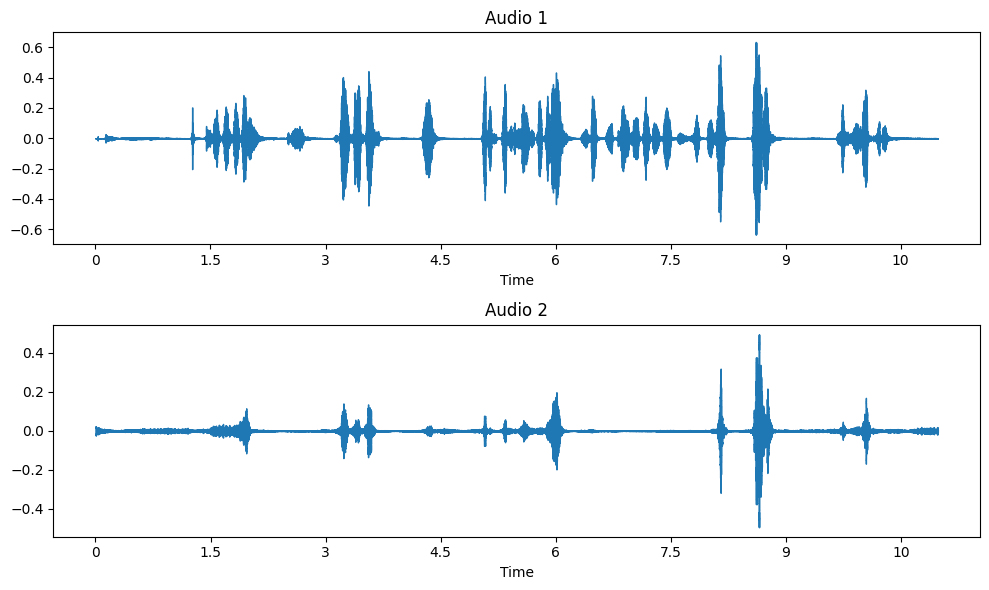

In [ ]:
two_audio_comparison('/content/9_gifted_1-41-0_1-40-50_hindi.m4a' , '/content/audio.wav')

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/one audio/audio.wav' , rate = 22050)